In [515]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd
import time
from scipy import stats
import heapq
import warnings


Queuing theory tells us that for FIFO scheduling the average waiting times are shorter for an
$M/M/n$ queue and a system load $\rho$ and processor capacity $\mu$ than for a single $M/M/1$ queue
with the same load characteristics (and thus an n-fold lower arrival rate). Of course, $\rho$ must be
less than one, but the experiment only becomes interesting when $\rho$ is not much less than one.

$\lambda$ then becomes $\lambda = \rho*n*\mu$.

Code sources: "https://simpy.readthedocs.io/en/latest/examples/bank_renege.html" and "https://www.youtube.com/watch?v=eSNfC-HOl44"

In [25]:
# M/M/1 (M/M/n) queueing system
def generate_interarrival(mu,n,rho):
    return random.expovariate(mu*n*rho)


def source(env, n, rho, mu, servers):
    """Source generates customers randomly based on exponential distribution"""
    i = 0
    while True:
        i += 1
        c = customer(env, i, servers, mu)
        env.process(c)
        t = random.expovariate(mu*n*rho)
        yield env.timeout(t)   

total_waiting_time = []

def customer(env, customer, servers, mu):
    """This generator function models the behavior of a customer in the queue."""
    time_of_arrival = env.now
    print(len(servers.queue))
    with servers.request() as req:    
        #print(env.now, 'customer {} arrives'.format(customer))
        yield req
        time_of_handling = random.expovariate(mu)
        #print(env.now, 'customer {} is being served'.format(customer))
        yield env.timeout(time_of_handling)
        waiting_time = env.now
        #print(env.now, 'customer {} departs'.format(customer))
        total_waiting_time.append(waiting_time-time_of_arrival)

### Setup and start the simulation

# Initial values            
mu = 1  # Parameter mu
rho = 0.9 #[0.7,0.85,0.9,0.95,0.99] # Parameter rho (varying for values close to 1)
n = 2 # Number of servers, in our case 1, 2 and 4

env = simpy.Environment()

# Start processes and run
servers = simpy.Resource(env, capacity=n)
env.process(source(env, n, rho, mu, servers))
env.run(until=200)
print(f"Total customers served: {len(total_waiting_time)}")
print(f"Average waiting time: {sum(total_waiting_time) / len(total_waiting_time) if total_waiting_time else 0}")

0
0
0
0
0
0
0
0
0
0
0
0
1
2
0
0
1
2
1
1
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
3
4
3
4
1
2
3
4
4
4
2
3
4
2
0
1
1
0
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
1
2
2
2
0
0
1
0
0
0
0
1
2
3
2
3
2
3
2
3
4
3
1
0
1
2
1
1
1
2
3
4
4
5
5
6
7
8
9
10
11
11
12
12
11
11
12
11
10
11
11
10
11
11
12
12
12
13
14
14
10
11
12
11
9
10
11
12
12
12
13
14
14
14
14
15
16
16
17
14
14
15
11
12
12
12
13
14
15
16
14
14
14
13
14
15
11
10
10
10
8
7
7
8
8
2
2
2
3
1
0
0
0
0
1
2
3
2
2
3
3
4
3
2
0
0
0
0
0
0
0
1
2
3
2
3
3
2
0
0
0
1
1
2
0
0
1
1
2
3
2
3
4
4
5
5
6
7
7
6
4
5
6
5
5
6
7
7
7
7
6
6
4
1
0
1
2
2
2
3
4
4
4
5
5
5
5
6
3
1
2
0
0
1
2
3
3
4
5
5
6
5
3
4
5
6
7
8
9
10
5
6
7
7
6
7
6
7
5
4
5
6
7
7
8
7
7
7
6
7
8
9
10
10
6
7
8
8
9
10
11
10
9
10
8
6
7
8
9
8
9
10
7
7
8
7
8
9
10
11
9
10
8
9
9
5
6
7
8
Total customers served: 344
Average waiting time: 3.858490410709952


In [6]:
# Defining function for simulating M/M/n queue system

# Setup and start the simulation
def sim_run(n,rho,mu,sim_duration):
    env = simpy.Environment()
    # Start processes and run
    servers = simpy.Resource(env, capacity=n)
    env.process(source(env, n, rho, mu, servers))
    env.run(until=sim_duration)
    
# Looping over the simulation and extracting mean and standard deviation
# Initial values
sim_duration = 500     
mu = 1  # Parameter mu
rho_vals = [0.9,0.95] #[0.7,0.85,0.92,0.95,0.99]
n = [1] #[1,2,4]
# Running simulation to calculate mean
sim_runs = 20
data = []

for n_servers in n:
    for rho in rho_vals:
        for i in range(sim_runs):
            total_waiting_time = []
            sim_run(n=n_servers, rho=rho, mu=mu, sim_duration=sim_duration)
            averages = np.concatenate((np.arange(100, 1000, 100), np.arange(1000, 10000, 1000), np.arange(10000, 100001, 10000)))
            df = pd.DataFrame({
                'run': [i] * len(averages),
                'rho': [rho] * len(averages),
                'number of servers': [n_servers] * len(averages),
                'number of customers': averages,
                'average waiting time': [np.mean(total_waiting_time[:n_customers]) for n_customers in averages]
            })
            data.append(df)

        print(f'rho={rho} for server number {n_servers} finished')

# Concatenate the list of DataFrames
result_df = pd.concat(data, ignore_index=True)    

rho=0.9 for server number 1 finished
rho=0.95 for server number 1 finished


In [ ]:
# Plot the mean and standard deviation of the waiting time

SJF implementation

#1 Preemptive SJF

In [435]:
def source(env, mu, n, rho, queue, q_arr):
    i = 0
    while True:
        i +=1
        time_of_handling = random.expovariate(mu)
        arrival_time = env.now
        heapq.heappush(queue, (time_of_handling, arrival_time))
        #print(f"Bisy: {servers.count}")
        tm = random.expovariate(mu*n*rho)
        #print(f"Customer is summoned, and the queue is {len(queue)}, time to next customer: {tm}")
        q_arr.append((env.now, len(queue)))
        yield env.timeout(tm)

def do_work(env, client, servers, time_to_finish, total_waiting_time, queue):
    with servers.request() as req:
        yield req
        #print(f"Server is requested, number of working severs {servers.count}/{servers.capacity}, and the que is {len(queue)}")
        yield env.timeout(time_to_finish)
        #print(f"Customer is processed, and the que is {len(queue)}")
        total_waiting_time.append((env.now,env.now - client))


def customer_initialise(env, servers, queue, total_waiting_time, q_arr):
    while True:
        if queue and servers.count < servers.capacity:
            #print(len(queue))
                #print(servers.capacity - servers.count)
                time_to_finish, client = heapq.heappop(queue)
                env.process(do_work(env, client, servers, time_to_finish, total_waiting_time, queue))
                #print(f"Customer send to server and the que is {len(queue)}")
                q_arr.append((env.now, len(queue)))
                yield env.timeout(0.001)
        else:
            yield env.timeout(0.01)


mu = 1.0          
n = 4             
rho = 1       
sim_time = 200    

env = simpy.Environment()
servers = simpy.Resource(env,capacity=n)
priority_queue = []
total_waiting_time = []
q_arr = []
print(priority_queue)
env.process(source(env, mu, n, rho, priority_queue, q_arr))
env.process(customer_initialise(env, servers, priority_queue, total_waiting_time, q_arr))
env.run(until=sim_time)

print(f"Total customers served: {len(total_waiting_time)}")


[]
Total customers served: 828


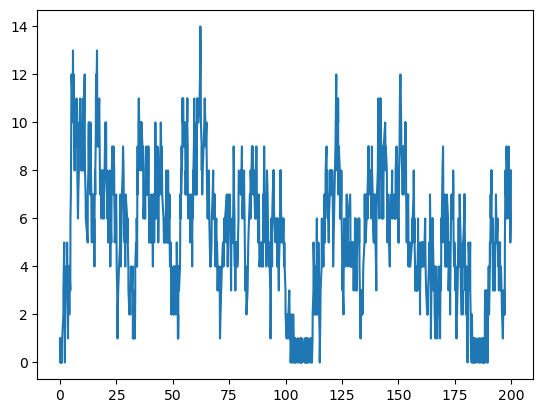

In [431]:
x = []
y = []
for i in q_arr:
    x.append(i[0])
    y.append(i[1])
plt.plot(x, y)

#2 Non preemptive SJF (halting the precesses if faster customer arrives)

In [256]:

class Client:
    def __init__(self, time_of_arrival, time_of_handling):
        self.time_of_arrival = time_of_arrival
        self.time_of_handling = time_of_handling

def source_preemptive(env, mu, n, rho, queue, q_arr):
    while True:
        time_of_handling = random.expovariate(mu)
        arrival_time = env.now
        heapq.heappush(queue, (time_of_handling, Client(arrival_time, time_of_handling)))
        mean_queue.append(len(queue))
        yield env.timeout(random.expovariate(mu*n*rho))

def do_work_preemptive(env, client, servers, time_to_finish, total_waiting_time, queue):
    with servers.request() as req:
        yield req
        if time_to_finish <= 0.01:
            yield env.timeout(time_to_finish)
            total_waiting_time.append(env.now - client.time_of_arrival)
        else:
            yield env.timeout(0.01)
            arrival_time = client.time_of_arrival
            time_of_handling = client.time_of_handling - 0.01
            heapq.heappush(queue, (time_of_handling, Client(arrival_time, time_of_handling)))
            
def customer_initialise_preemptive(env, servers, queue, total_waiting_time, q_arr):
    while True:
        if queue and servers.count < servers.capacity:
            time_to_finish, client = heapq.heappop(queue)
            env.process(do_work_preemptive(env, client, servers, time_to_finish, total_waiting_time, queue))
        else:
            yield env.timeout(0.005)

def cheker_que(mean_queue, queue, total_waiting_time, mean_waiting_time):
    while True:
        mean_waiting_time.append(np.mean(total_waiting_time))
        yield env.timeout(0.1)

    

mu = 1.0         
n = 2             
rho = 0.95         
sim_time = 150
env = simpy.Environment()
servers = simpy.Resource(env,capacity=n)
priority_queue = []
total_waiting_time = []
mean_queue = []
mean_waiting_time = []
q_arr = [] 
env.process(source_preemptive(env, mu, n, rho, priority_queue, q_arr))
env.process(customer_initialise_preemptive(env, servers, priority_queue, total_waiting_time, q_arr))
env.process(cheker_que(mean_queue, priority_queue, total_waiting_time, mean_waiting_time))
env.run(until=sim_time)
print(f"Que length mean: {q_arr}")
print(f"Total customers served: {len(total_waiting_time)}")
print(f"Average waiting time: {sum(total_waiting_time) / len(total_waiting_time)}")

Que length mean: []
Total customers served: 280
Average waiting time: 6.673131816580441


/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


#3 Data analysis

In [625]:
warnings.simplefilter(action='ignore', category=FutureWarning)
def sim_run(n,rho,mu,sim_time):
    env = simpy.Environment()
    servers = simpy.Resource(env,capacity=n)
    priority_queue = []
    total_waiting_time = []
    q_arr = [] 
    env.process(source(env, mu, n, rho, priority_queue, q_arr))
    env.process(customer_initialise(env, servers, priority_queue, total_waiting_time, q_arr))
    env.run(until=sim_time)
    return total_waiting_time, q_arr
mean_queue_lengths = pd.DataFrame()
rho_vals = [0.85,0.9,0.95,0.99]
serv = [1, 2, 4]
sim_time = 20000
mu = 1.0         
all_results = []
second_data_que = []
mean_vaiting = []
all_results_mean = []
z_score = 1.96
mean_std_ci_queue_lengths = pd.DataFrame()
mean_std_ci_waiting_time = pd.DataFrame()
waiting_time_general_stat = pd.DataFrame()
simulations = 100
for server in serv:
    for p_value in rho_vals:
        second_data_que = []
        mean_vaiting = []
        mean_waiting_data_for_statistics = []
        std_waiting_data_for_statistics = []
        customers_srvd_stat = []
        queue_stat = []
        maxim = -np.inf
        minim = np.inf
        maxim_que = -np.inf
        minim_que = np.inf
        maxim_customers_served = -np.inf
        minim_customers_served = np.inf
        for run in range(simulations):
            waiting_data, queue_data = sim_run(server,p_value,mu,sim_time)
            f = lambda a: a[1]
            waiting_data_true = list(map(f, waiting_data))
            queue_data_true = list(map(f, queue_data))
            mean_queue_cur_sim = np.mean(queue_data_true)
            mean_waiting_cur_sim = np.mean(waiting_data_true)
            max_waiting = np.max(waiting_data_true)
            maxim = max(max_waiting, maxim)
            min_waiting = np.min(waiting_data_true)
            minim = min(min_waiting, minim)
            max_que = np.max(queue_data_true)
            maxim_que = max(max_que, maxim_que)
            min_que = np.min(queue_data_true)
            minim_que = min(min_que, minim_que)
            customer_served = len(waiting_data_true)
            maxim_customers_served = max(customer_served, maxim_customers_served)
            minim_customers_served = min(customer_served, minim_customers_served)
            std_within_sim_waiting = np.std(waiting_data_true)
            mean_waiting_data_for_statistics.append(mean_waiting_cur_sim)
            std_waiting_data_for_statistics.append(std_within_sim_waiting)
            queue_stat.append(mean_queue_cur_sim)
            customers_srvd_stat.append(customer_served)
            df_queue = pd.DataFrame(queue_data, columns=['Time', 'Queue_Length'])
            df_queue['Time'] = df_queue['Time'].round().astype(int) // 100
            df_second_mean = df_queue.groupby('Time').mean()
            second_data_que.append(df_second_mean)
            df_waiting = pd.DataFrame(waiting_data, columns=['Time', 'Waiting_time'])
            df_waiting['Time'] = df_waiting['Time'].round().astype(int) // 100
            df_waiting_mean = df_waiting.groupby('Time').mean()
            mean_vaiting.append(df_waiting_mean)
        for second in range(0, sim_time, 100):
            interval_data = [pd.Series(df.loc[second]['Queue_Length']) if second in df.index else pd.Series([0]) for df in second_data_que]
            concatenated_data = pd.concat(interval_data, ignore_index=True)
            mean_length = concatenated_data.mean()
            std_dev = concatenated_data.std()
            margin_of_error = z_score * (std_dev / np.sqrt(len(concatenated_data)))
            lower_bound = mean_length - margin_of_error
            upper_bound = mean_length + margin_of_error
            mean_std_ci_queue_lengths = mean_std_ci_queue_lengths._append({
                'Server_Count': server, 
                'P_Value': p_value, 
                'Time_Second': second,
                'Mean_Queue_Length': mean_length,
                'Std_Dev_Queue_Length': std_dev,
                'CI_Lower_Bound': lower_bound,
                'CI_Upper_Bound': upper_bound
            }, ignore_index=True)
            interval_data_waiting = [pd.Series(df.loc[second]['Waiting_time']) if second in df.index else pd.Series() for df in mean_vaiting]
            concatenated_data_waiting = pd.concat(interval_data_waiting, ignore_index=True)
            mean_length_waiting = concatenated_data_waiting.mean()
            std_dev_waiting = concatenated_data_waiting.std()
            confidence_waiting_time = z_score * (std_dev_waiting / np.sqrt(len(concatenated_data_waiting)))
            lower_bound_waiting = mean_length_waiting - confidence_waiting_time
            upper_bound_waiting = mean_length_waiting + confidence_waiting_time
            mean_std_ci_waiting_time = mean_std_ci_waiting_time._append({
                'Server_Count': server, 
                'P_Value': p_value, 
                'Time_Second': second,
                'Mean_Waiting_time': mean_length_waiting,
                'Std_Dev_Waiting_time': std_dev_waiting,
                'CI_Lower_Bound': lower_bound_waiting,
                'CI_Upper_Bound': upper_bound_waiting
            }, ignore_index=True)
        whole_sim_mean = np.mean(mean_waiting_data_for_statistics) 
        whole_sim_within_std = np.mean(std_waiting_data_for_statistics)
        std_whole_sim = np.std(mean_waiting_data_for_statistics)  
        std_fr_std_whole_sim = np.std(std_waiting_data_for_statistics)  
        confidence_waiting_time_whole = z_score * (std_whole_sim / np.sqrt(len(mean_waiting_data_for_statistics)))
        lower_bound_waiting_whole = whole_sim_mean - confidence_waiting_time_whole
        upper_bound_waiting_whole = whole_sim_mean + confidence_waiting_time_whole   
        confidence_waiting_std_within = z_score * (std_fr_std_whole_sim / np.sqrt(len(std_waiting_data_for_statistics)))
        lower_bound_waiting_std_within = whole_sim_within_std - confidence_waiting_std_within
        upper_bound_waiting_std_within = whole_sim_within_std + confidence_waiting_std_within 
        customers_served_mean = np.mean(customers_srvd_stat)
        customers_served_std = np.std(customers_srvd_stat)
        confidence_customers_served = z_score * (customers_served_std / np.sqrt(len(customers_srvd_stat)))
        lower_bound_customers_served = customers_served_mean - confidence_customers_served
        upper_bound_customers_served = customers_served_mean + confidence_customers_served 
        mean_que = np.mean(queue_stat)
        std_que = np.mean(queue_stat)
        confidence_que = z_score * (std_que / np.sqrt(len(queue_stat)))
        lower_bound_que = mean_que - confidence_que
        upper_bound_que = mean_que + confidence_que 
        waiting_time_general_stat = waiting_time_general_stat._append({
                'Server_Count': server, 
                'P_Value': p_value, 
                'Mean_Waiting_time': whole_sim_mean,
                'Mean_Within_Std_of_Waiting_time': whole_sim_within_std,
                'Customers_Served': customers_served_mean,
                'Mean_queue': mean_que,
                'Std_within_Waiting_time': std_fr_std_whole_sim,
                'Std_Dev_Waiting_time': std_whole_sim,
                'Std_Dev_Customers_served': customers_served_std,
                'Std_Dev_Queue': std_que,
                'CI_Lower_Bound_Mean': lower_bound_waiting_whole,
                'CI_Upper_Bound_Mean': upper_bound_waiting_whole,
                'CI_Lower_Bound_Std': lower_bound_waiting_std_within,
                'CI_Upper_Bound_Std': upper_bound_waiting_std_within, 
                'CI_Lower_Bound_Customers_Served': lower_bound_customers_served,
                'CI_Upper_Bound_Customers_Served': upper_bound_customers_served, 
                'CI_Lower_Bound_Queue': lower_bound_que,
                'CI_Upper_Bound_Queue': upper_bound_que, 
                'Min_waiting_time': minim,
                'Max_waiting_time': maxim,
                'Min_queue': minim_que,
                'Max_queue': maxim_que,
                'Min_customers_served': minim_customers_served,
                'Max_customers_served': maxim_customers_served
                }, ignore_index=True)



        


/var/folders/j1/w77jn90n4xz0jc6gqk110_x00000gn/T/ipykernel_45448/3399852673.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_dataseto = filtered_dataset[mak2]


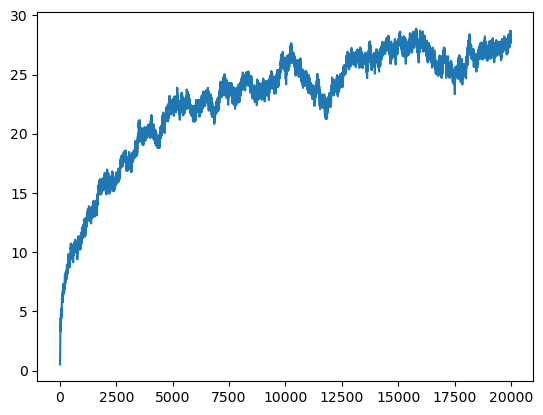

In [574]:
mak = mean_std_ci_queue_lengths["Server_Count"] == 4
mak2 = mean_std_ci_queue_lengths["P_Value"] == 0.99
filtered_dataset = mean_std_ci_queue_lengths[mak]
filtered_dataseto = filtered_dataset[mak2]
filtered_datasetos = filtered_dataseto["Mean_Queue_Length"].rolling(window=1).mean()
x = np.linspace(0, 19999, 20000)
plt.plot(x, filtered_datasetos)

In [524]:
mean_std_ci_queue_lengths

,Server_Count,P_Value,Time_Second,Mean_Queue_Length,Std_Dev_Queue_Length,CI_Lower_Bound,CI_Upper_Bound
0,1.0,0.85,0.0,0.570667,0.170973,0.537156,0.604177
1,1.0,0.85,1.0,0.504833,0.612726,0.384739,0.624928
2,1.0,0.85,2.0,0.676333,0.757844,0.527796,0.824871
3,1.0,0.85,3.0,0.702000,0.742532,0.556464,0.847536
4,1.0,0.85,4.0,0.717333,0.850846,0.550568,0.884099
...,...,...,...,...,...,...,...
239995,4.0,0.99,19995.0,28.672579,22.318083,24.298235,33.046923
239996,4.0,0.99,19996.0,28.691607,22.214104,24.337643,33.045571
239997,4.0,0.99,19997.0,28.295431,22.214265,23.941435,32.649427
239998,4.0,0.99,19998.0,28.115611,22.371680,23.730761,32.500460


In [519]:
mean_std_ci_waiting_time

,Server_Count,P_Value,Time_Second,Mean_Waiting_time,Std_Dev_Waiting_time,CI_Lower_Bound,CI_Upper_Bound
0,1.0,0.85,0.0,0.257487,0.151779,0.209851,0.305123
1,1.0,0.85,1.0,0.708382,0.366315,0.614107,0.802657
2,1.0,0.85,2.0,0.964071,0.571505,0.805658,1.122484
3,1.0,0.85,3.0,1.270802,0.967022,1.030091,1.511513
4,1.0,0.85,4.0,1.434171,0.932522,1.175689,1.692653
...,...,...,...,...,...,...,...
239995,4.0,0.99,19995.0,3.949623,15.919456,0.765069,7.134178
239996,4.0,0.99,19996.0,3.844977,8.915662,2.070690,5.619263
239997,4.0,0.99,19997.0,6.447664,24.546159,1.636617,11.258711
239998,4.0,0.99,19998.0,17.880536,150.465362,-12.063252,47.824324


[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800

/var/folders/j1/w77jn90n4xz0jc6gqk110_x00000gn/T/ipykernel_45448/866611507.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_dataseto = filtered_dataset[mak2]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


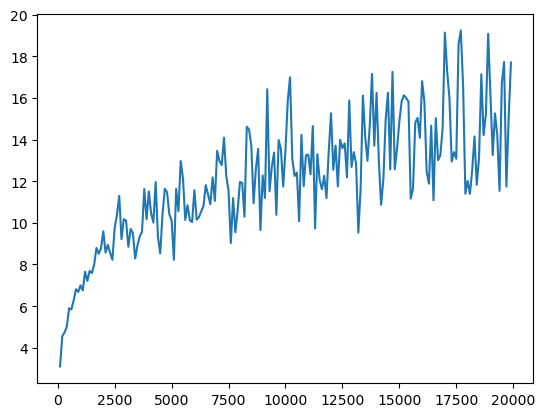

In [624]:
mak = mean_std_ci_waiting_time["Server_Count"] == 1
mak2 = mean_std_ci_waiting_time["P_Value"] == 0.99
filtered_dataset = mean_std_ci_waiting_time[mak]
filtered_dataseto = filtered_dataset[mak2]
filtered_datasetos = filtered_dataseto["Mean_Waiting_time"]
filtered_datasetos = np.array(filtered_datasetos)
ma = []
for x in range(0, 20000, 100):
    ma.append(x)
print(ma)
filtered_datasetoso = [np.mean(filtered_datasetos[n_customers-100:n_customers]) for n_customers in ma]
x = np.linspace(0, 19999, 20000)
plt.plot(ma, filtered_datasetoso)

In [520]:
waiting_time_general_stat

,Server_Count,P_Value,Mean_Waiting_time,Mean_Within_Std_of_Waiting_time,Customers_Served,Mean_queue,Std_within_Waiting_time,Std_Dev_Waiting_time,Std_Dev_Customers_served,Std_Dev_Queue,...,CI_Lower_Bound_Customers_Served,CI_Upper_Bound_Customers_Served,CI_Lower_Bound_Queue,CI_Upper_Bound_Queue,Min_waiting_time,Max_waiting_time,Min_queue,Max_queue,Min_customers_served,Max_customers_served
0,1.0,0.85,3.432077,8.635335,17016.72,2.571134,1.638527,0.190134,144.433935,2.571134,...,16988.410949,17045.029051,2.067192,3.075076,0.000137,838.851129,0.0,23.0,16560.0,17326.0
1,1.0,0.90,4.317495,15.297585,17995.91,3.491707,3.751692,0.326025,130.040001,3.491707,...,17970.422160,18021.397840,2.807333,4.176082,0.000104,1760.873373,0.0,25.0,17719.0,18293.0
2,1.0,0.95,6.655866,41.933825,19006.08,5.912704,18.901148,1.192020,141.913331,5.912704,...,18978.264987,19033.895013,4.753814,7.071594,0.000341,8253.399486,0.0,39.0,18642.0,19295.0
3,1.0,0.99,13.506591,145.444953,19776.11,15.688858,72.497711,4.219513,135.594387,15.688858,...,19749.533500,19802.686500,12.613841,18.763874,0.000856,18444.994728,0.0,113.0,19451.0,20197.0
4,2.0,0.85,2.200391,4.417867,34006.03,2.540656,0.507862,0.066191,182.921319,2.540656,...,33970.177421,34041.882579,2.042688,3.038625,0.000046,381.890191,0.0,25.0,33609.0,34432.0
5,2.0,0.90,2.664304,7.560324,35981.87,3.497904,1.320858,0.121640,190.642789,3.497904,...,35944.504013,36019.235987,2.812315,4.183493,0.000176,819.646296,0.0,30.0,35560.0,36539.0
6,2.0,0.95,3.946641,20.744169,37999.67,6.119342,7.085568,0.457210,193.311048,6.119342,...,37961.781035,38037.558965,4.919951,7.318733,0.000256,4099.882427,0.0,47.0,37557.0,38454.0
7,2.0,0.99,9.104270,112.891767,39565.90,19.390872,67.374258,3.108391,204.913177,19.390872,...,39525.737017,39606.062983,15.590261,23.191483,0.000106,18525.897595,0.0,110.0,39057.0,40056.0
8,4.0,0.85,1.567655,2.371810,67989.27,2.429514,0.168612,0.027532,249.360256,2.429514,...,67940.395390,68038.144610,1.953329,2.905699,0.000027,209.529488,0.0,29.0,67494.0,68557.0
9,4.0,0.90,1.838999,3.939698,72036.61,3.525113,0.552040,0.051577,241.840315,3.525113,...,71989.209298,72084.010702,2.834191,4.216035,0.000145,462.857230,0.0,35.0,71467.0,72711.0
